# Initial imports and downloads (if required)

In [37]:
# Numpy
try:
    from numpy import array, linspace
except ImportError:
    %pip install numpy
    from numpy import array, linspace

# Matplotlib
try: 
    import matplotlib.pyplot as plt
except ImportError:
    %pip install matplotlib
    import matplotlib.pyplot as plt

# Ddeint
try:
    from ddeint import ddeint  
except ImportError:
    %pip install ddeint
    from ddeint import ddeint
    # Assuming you're using ddeint for delay differential equations


# Model
The variables still need to be properly described on what type of thing it is

In [38]:
def model(Y, t, delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo):
    s, xs, xi, p = Y(t)            #mg/L, CFU/L, CFU/L, PFU/L

    #Set constraints
    s = max(s,0)
    s = min(s,9.077)
    xs = max(xs,0)
    xi = max(xi,0)
    p = max(p,0)
    
    mu = (mu_max * s) / (ks + s)   #1/min  
    qo = 10*mo
    
    if s >= 9.077:
        OTR = 0
    else:
        OTR = (kla * (cgl - s))

    if s + OTR > 9.077:
        OTR = 9.077 - s

    if s <= 0:
        ro = OTR
    else:
        ro = qo * (xs+xi)

    if s > 0:
        dxdt = mu*(xs+xi)
    else:
        dxdt = OTR/Yxo
    
    # Differential equations with delays
    dsdt = -(ro) + OTR
    dxsdt = (dxdt) - (delta * xs * p)
    dxidt = (delta * xs * p) - ((1/tau) * xi)
    dpdt = (beta *((1/tau)*xi)) - (delta * xs * p)   

    return array([dsdt, dxsdt, dxidt, dpdt])

# Set the initial conditions

In [39]:
# Initial conditions function
g = lambda t: array([9.077, 5*10**10, 0, 0])
 
# Time range
tt = linspace(0, 440, 1000)  
# tt = linspace(0, 4, 5)  

# Parameters for the system
delta = (1 / (60 * 1000)) * 10**(-9)  # L/(CFU*PFU*min)  Phage adsorption rate
tau = 25                              # min              Tau
beta = 25                             # PFU/CFU          Burst size
mu_max = 0.611 / 60                   # 1/min            Max growth rate
ks = 0.07                             # mg/L              monod constant
kla = 75/60                           # 1/min oxygen mass transfer coefficient
cgl = 0.21*1.07*32                    # mg/L concentration of oxygen in gass at boundary layer
mo = 5.3*10**-13                      # mg/CFU/min oxygen taken up by the bacteria for maintenance
Yxo = 3*10**-10                       # yield of cells on oxygen (mg/CFU)

# Solving the equation and plotting it

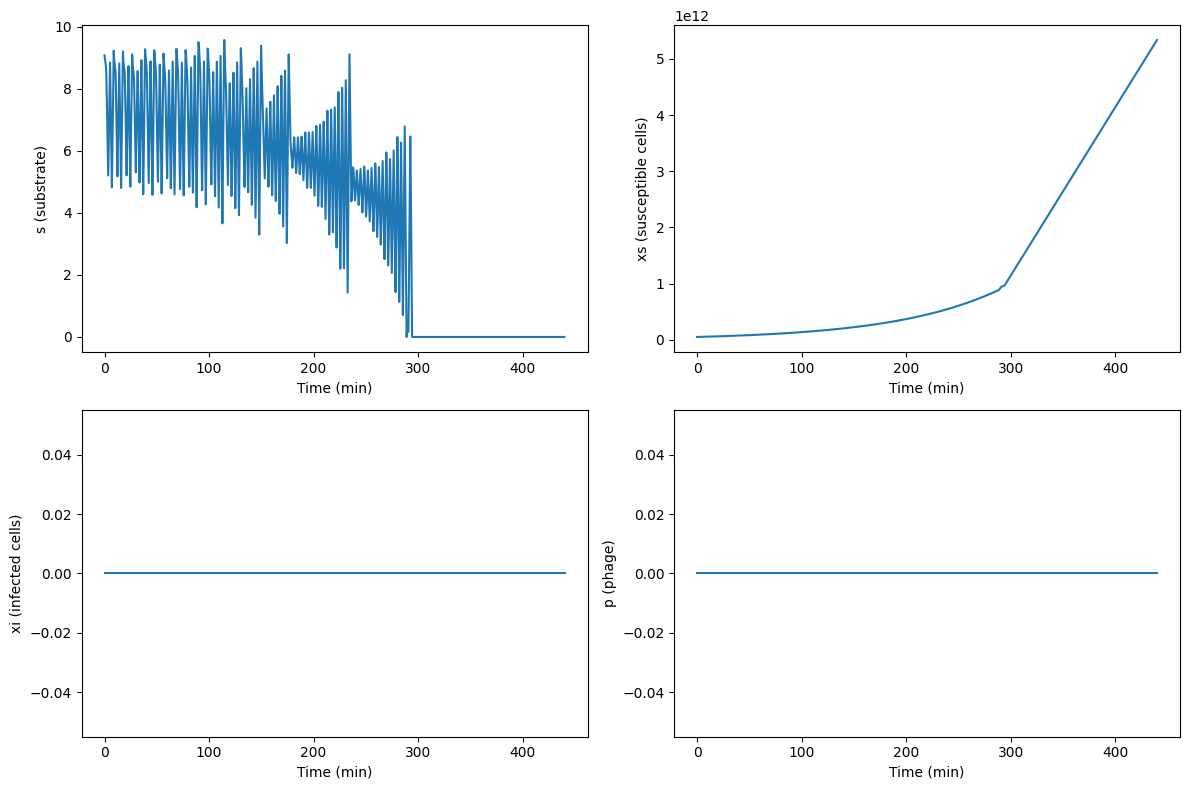

In [40]:
# Solve the system
yy = ddeint(model, g, tt, fargs=(delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo))
yy[yy < 0] = 0

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 graphs

# Plot s vs time
axs[0, 0].plot(tt, yy[:, 0])
axs[0, 0].set_ylabel('s (substrate)')
axs[0, 0].set_xlabel('Time (min)')

# Plot xs vs time
axs[0, 1].plot(tt, yy[:, 1])
axs[0, 1].set_ylabel('xs (susceptible cells)')
axs[0, 1].set_xlabel('Time (min)')

# Plot xi vs time
axs[1, 0].plot(tt, yy[:, 2])
axs[1, 0].set_ylabel('xi (infected cells)')
axs[1, 0].set_xlabel('Time (min)')

# Plot p vs time
axs[1, 1].plot(tt, yy[:, 3])
axs[1, 1].set_ylabel('p (phage)')
axs[1, 1].set_xlabel('Time (min)')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.3)

plt.tight_layout()
plt.show()

# Initial conditions second calculation
Need to make it clearer, but will not change the code myself

In [41]:
# Initial conditions function for the second run, using the last state of the first run (basically last value of the function at timepoint 420 min)
#g = lambda t: array([yy[-1, 0], yy[-1, 1], yy[-1, 2], yy[-1, 3]])
g = lambda t: array([yy[-1, 0], yy[-1, 1], 0, 10**4])

# Time range
tt = linspace(440, 660, 1000)
# tt = linspace(5, 30, 26)

# Plot the second situation

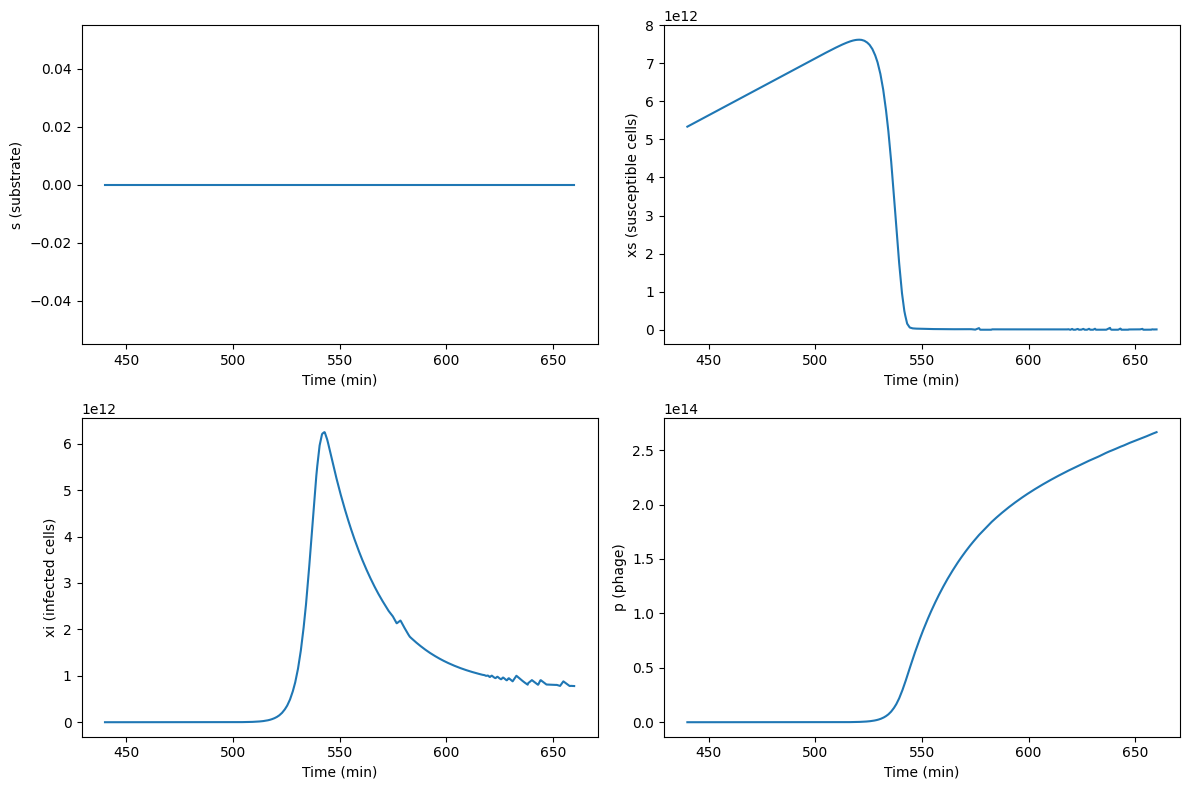

In [42]:
# Solve the system
yy = ddeint(model, g, tt, fargs=(delta, tau, beta, mu_max, ks, kla, cgl, mo, Yxo))
yy[yy < 0] = 0

fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for 4 graphs

# Plot s vs time
axs[0, 0].plot(tt, yy[:, 0])
axs[0, 0].set_ylabel('s (substrate)')
axs[0, 0].set_xlabel('Time (min)')

# Plot xs vs time
axs[0, 1].plot(tt, yy[:, 1])
axs[0, 1].set_ylabel('xs (susceptible cells)')
axs[0, 1].set_xlabel('Time (min)')

# Plot xi vs time
axs[1, 0].plot(tt, yy[:, 2])
axs[1, 0].set_ylabel('xi (infected cells)')
axs[1, 0].set_xlabel('Time (min)')

# Plot p vs time
axs[1, 1].plot(tt, yy[:, 3])
axs[1, 1].set_ylabel('p (phage)')
axs[1, 1].set_xlabel('Time (min)')

plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.3)

plt.tight_layout()
plt.show()